In [ ]:
import os
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('combined(1).csv',encoding='ISO-8859-1')

# 1.Acquisitions data analysis

In [ ]:
data.head()

,id,entity_type,entity_id,name,normalized_name,permalink,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,price_amount,price_currency_code,acquired_at
0,c:1,Company,1,Wetpaint,wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,NaN,NaN,NaN
1,c:1001,Company,1001,FriendFeed,friendfeed,/company/friendfeed,web,acquired,2007-10-01,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,"socialnetwork, newsfeed, socialnetworkaggregator",USA,CA,Mountain View,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,47500000.0,USD,2009-08-10
2,c:10014,Company,10014,Mobclix,mobclix,/company/mobclix,mobile,acquired,2008-03-01,iPhone Ad Exchange Provider,Mobclix (www.mobclix.com) is the industry's la...,"techcrunch50, tc50, iphone, analytics, free-de...",USA,CA,Palo Alto,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,NaN,0.0,USD,2010-09-30
3,c:100155,Company,100155,MTPV,mtpv,/company/mtpv,cleantech,non_acquired,2003-01-01,NaN,MTPV Corporation is a clean energy company foc...,NaN,USA,TX,Austin,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,arun,NaN,NaN,NaN
4,c:10018,Company,10018,Demandbase,demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,NaN,Demandbase is the first targeting and personal...,NaN,USA,CA,San Francisco,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,jason,NaN,NaN,NaN


In [ ]:
tracxn=tracxn.rename(columns={"Company Name": "name"})
tracxn.head(3)

,name,Domain,Overview,Founded Year,Taxonomy,Total Funding,Company Stage,City,Country,Description,Investors,Founder's Info,Last Funded Date,Last Funding Amount,Total Funding(USD),Editor Rating,Unicorn Status,Mobile Downloads,Twitter Followers,Web Traffic Rank,Company Status,Company Status Details
0,Lyft,lyft.com,On-Demand Taxi,2012,Road Transport Tech>Ride Hailing>Cars>Taxi>Int...,5.10B,Public,San Francisco,US & Canada,Lyft is an on-demand taxi-hailing app. Lyft co...,"Artha India Ventures,Fidelity Investments,Sena...","John Zimmer,Co-Founder and President,Ex-Lehman...",8/5/2018,NaN,5100300000,5,undefined,33000000,292551,NaN,IPO,IPO(NASDAQ:LYFT 2019/3/29)
1,Airbnb,airbnb.com,Marketplace for vacation rental accommodations,2008,Y Combinator Batches>2009>Winter; Online Trave...,3.63B,Series F,San Francisco,US & Canada,Airbnb provides a marketplace for people to li...,"TCV,CapitalG,Manhattan Venture Partners,Andree...","Nathan Blecharczyk,Co-Founder & CTO,Was Owner ...",8/8/2019,25.92M,3627215232,5,DECACORN,75000000,undefined,NaN,NaN,NaN
2,Magic Leap,magicleap.com,Head-mounted virtual retinal display to view a...,2011,Augmented Reality>Display Medium>Projection-ba...,2.58B,Series E,Miami,US & Canada,Magic Leap is a startup working on a head-moun...,"JPMorgan Chase,Ntt DoCoMo,AT&T,Public Investme...","Rony Abovitz,Founder & CEO,ex-MAKO Surgical, C...",11/10/2019,NaN,2580000000,5,UNICORN,undefined,76319,NaN,NaN,NaN


## Target Variable Distribution

Text(0.5, 1.0, 'acquired v/s non acquired companies count')

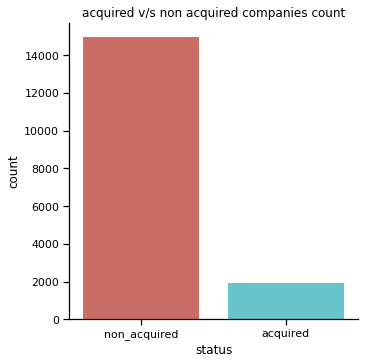

In [ ]:
sns.catplot(x="status", kind="count", palette="hls", data=data) 
plt.title('acquired v/s non acquired companies count')   

In [ ]:
data=data.drop(['normalized_name'],axis=1)
data=data.drop(['entity_type'],axis=1)

## Category wise analysis of acquired companies

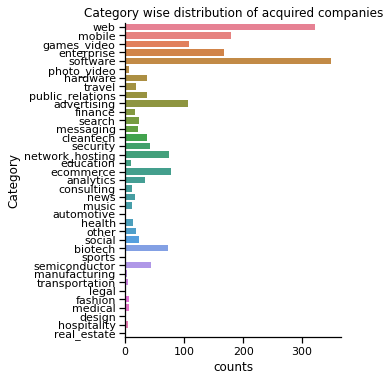

In [ ]:
%matplotlib inline
acq_data1=data[data['status']=='acquired']
import matplotlib.pyplot as plt
#plt.figure(figsize=(30, 30))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.catplot(y="category_code", kind="count", palette="husl" ,data=acq_data1)    
plt.xlabel('counts')
plt.ylabel('Category')
plt.title('Category wise distribution of acquired companies')
plt.show()


In [ ]:
data[data['category_code']=='web']['description'][10:20]
                                    

51                 Digital Entertainment Studio
56                                          NaN
74                                          NaN
81                  Jobs, part-time and at-home
86                    Online research provider 
90     MicroPayment Service for Social Networks
92                                          NaN
94                     online mind mapping SaaS
95                                          NaN
101                        websites development
Name: description, dtype: object

In [ ]:
data[data['category_code']=='mobile']['description'][80:90]

999            Queue Elimination System
1000     location based event discovery
1014        Auto repair app and website
1015    Personalize. Connect. Practice.
1017           Creative Content Startup
1020          Rural marketing plateform
1025                                NaN
1028                       Mobile Email
1029                      Making magic.
1030             Mobile Coupon Platform
Name: description, dtype: object

In [ ]:

data.loc[data.category_code== 'mobile','category_code']='Mobile Apps/services'

In [ ]:
data[data['category_code']=='games_video']['description'][30:40]

353                                       NaN
374               Online Sports Entertainment
382     Server-based Gaming and Desktop Apps.
387                Interactive music solution
395                            Fantasy Sports
397                                       NaN
409                                       NaN
441                Conference and Event Video
442    Frequent Flyer Miles for Entertainment
466      Real-World Social Gaming, iPhone App
Name: description, dtype: object

In [ ]:
data.loc[data.category_code== 'games_video','category_code']='Video games'

In [ ]:
data[data['category_code']=='software']['description'][30:40]

228            Advanced voice applications
255      Realtime Operational Intelligence
256        B2B Sales Intelligence Software
261        application management software
262                                    NaN
274              data management solutions
283                Hotel Software Solution
293                                    NaN
301      Indoor Navigation and Positioning
302    Central Ordering Platform for SMB's
Name: description, dtype: object

In [ ]:
data[data['category_code']=='enterprise']['description'][90:100]


1220                          Great food at work
1221                      The Load Testing Cloud
1237                            Secure Cloud VPN
1259           Mobile Application Creative Suite
1276               Video Interviewing Technology
1278                                         NaN
1283                 Content creation for brands
1290    Collect, organize and improve knowledge.
1301          Software for University Admissions
1306                                         NaN
Name: description, dtype: object

In [ ]:
data.loc[data.category_code== 'enterprise','category_code']='software'

In [ ]:
data[data['category_code']=='hardware']['description'][70:80]

3342                                      NaN
3348                  Lifelike dinosaur robot
3364                                      NaN
3378              Digital camera technologies
3427         Indoor and Outdoor  LED Lighting
3428            Recreational Sports Equipment
3476                Modern kitchen appliances
3501    Telecommunications Equipment Supplier
3523                 Innovative Baby Products
3545                                      NaN
Name: description, dtype: object

In [ ]:
data[data['category_code']=='messaging']['description'][30:40]

3413                                NaN
3434       Internal Communications Tool
3640      Google Voice but for Business
3697                                NaN
3727    Sometimes, we just need to talk
3757       Social Conversation Platform
4087                                NaN
4190                                NaN
4270                                NaN
4310               Online gifts service
Name: description, dtype: object

In [ ]:
data.loc[data.category_code== 'messaging','category_code']='web'

In [ ]:
data[data['category_code']=='search']['description'][50:60]

3530         Hotels.com of Crowdfunding Industry
3555               Local search for US Hispanics
3571          Natural Language Understanding API
3659      Disruptive Pattern Matching in Science
3945                               Search engine
4019                        Web Tools Reinvented
4111                        Mobile Search Engine
4238                         Search-as-a-Service
4410    Share, sell and chat with your neighbors
4546                        Social search engine
Name: description, dtype: object

In [ ]:
data.loc[data.category_code== 'search','category_code']='web'

In [ ]:
data.loc[data.category_code== 'photo_video','category_code']='software'

In [ ]:
data[data['category_code']=='security']['description'][90:100]

5083                                      NaN
5093    real-time global control and security
5232                                      NaN
5242                             Web Security
5257    Realtime Online Identity Verification
5276                     Information Security
5286            Real-Time Anti Fraud Solution
5297                          E-mail Platform
5334                                      NaN
5457        Next Generation Threat Management
Name: description, dtype: object

In [ ]:
data.loc[data.category_code== 'security','category_code']='Cyber-security'

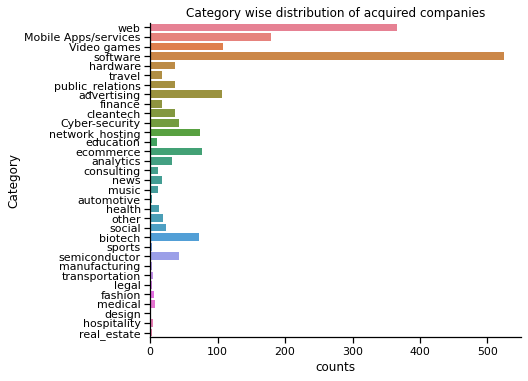

In [ ]:
%matplotlib inline
acq_data1=data[data['status']=='acquired']
import matplotlib.pyplot as plt
#plt.figure(figsize=(30, 30))
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
sns.catplot(y="category_code", kind="count", palette="husl" ,data=acq_data1 ,height =5 ,aspect=1.5)    
plt.xlabel('counts')
plt.ylabel('Category')
plt.title('Category wise distribution of acquired companies')
plt.show()


In [ ]:
data.loc[data.category_code == 'web', 'is_IT/enterprise'] = 1
data.loc[data.category_code == 'software', 'is_IT/enterprise'] = 1
data.loc[data.category_code == 'ecommerce', 'is_IT/enterprise'] = 1
data.loc[data.category_code == 'mobile', 'is_IT/enterprise'] = 1
data['is_IT/enterprise']=data['is_IT/enterprise'].fillna(0)


## Country wise analysis of acquired companies

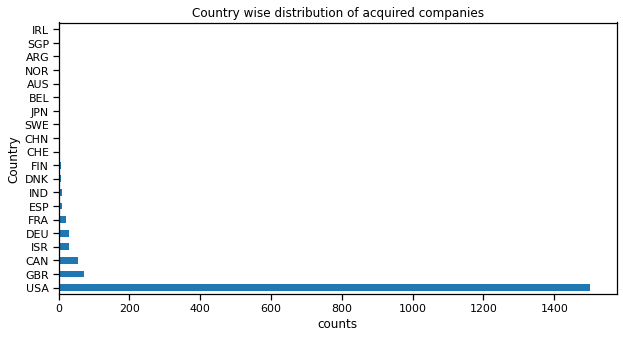

In [ ]:
import matplotlib.pyplot as plt
acq_data1['country_code'].value_counts().head(20).plot(kind='barh', figsize=(10,5))    
plt.xlabel('counts')
plt.ylabel('Country')
plt.title('Country wise distribution of acquired companies')
plt.show()

In [ ]:
data.loc[data.country_code == 'USA', 'is_USA_based'] = 1
data['is_USA_based']=data['is_USA_based'].fillna(0)

# Average funding per round

In [ ]:
data['avg_fund_per_round']=data['funding_total_usd']/data['funding_rounds']
data['avg_fund_per_round']=data['avg_fund_per_round'].fillna(0)
data['avg_fund_per_round']=data['avg_fund_per_round'].astype('int')

In [ ]:
data.head()

,id,entity_id,name,permalink,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,price_amount,price_currency_code,acquired_at,is_IT/enterprise,is_USA_based,avg_fund_per_round
0,c:1,1,Wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,NaN,NaN,NaN,1.0,1.0,13250000
1,c:1001,1001,FriendFeed,/company/friendfeed,web,acquired,2007-10-01,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,"socialnetwork, newsfeed, socialnetworkaggregator",USA,CA,Mountain View,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,47500000.0,USD,2009-08-10,1.0,1.0,5000000
2,c:10014,10014,Mobclix,/company/mobclix,Mobile Apps/services,acquired,2008-03-01,iPhone Ad Exchange Provider,Mobclix (www.mobclix.com) is the industry's la...,"techcrunch50, tc50, iphone, analytics, free-de...",USA,CA,Palo Alto,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,NaN,0.0,USD,2010-09-30,0.0,1.0,0
3,c:100155,100155,MTPV,/company/mtpv,cleantech,non_acquired,2003-01-01,NaN,MTPV Corporation is a clean energy company foc...,NaN,USA,TX,Austin,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,arun,NaN,NaN,NaN,0.0,1.0,3375097
4,c:10018,10018,Demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,NaN,Demandbase is the first targeting and personal...,NaN,USA,CA,San Francisco,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,jason,NaN,NaN,NaN,0.0,1.0,11000000


## Funding months difference

In [ ]:
data['first_funding_at'] = data['first_funding_at'].astype(str)
data['last_funding_at']=data['last_funding_at'].astype(str)
data['first_stripped'] = data['first_funding_at'].str.split('-')
data['last_stripped'] = data['last_funding_at'].str.split('-')
from datetime import date
data['first_last_funding_diff']=""
for i in range(0,len(data)):
  if((data['first_stripped'][i][0]!='nan') and (data['last_stripped'][i][0]!='nan')):
    D1=data['first_stripped'][i][2]
    M1=data['first_stripped'][i][1]
    Y1=data['first_stripped'][i][0]
    D2=data['last_stripped'][i][2]
    M2=data['last_stripped'][i][1]
    Y2=data['last_stripped'][i][0]
    
      
    d0 = date(int(Y1), int(M1), int(D1))
    d1 = date(int(Y2), int(M2), int(D2))
    delta=d1-d0
    data['first_last_funding_diff'][i]=int(delta.days/30)
data=data.drop(['first_stripped'],axis=1)
data=data.drop(['last_stripped'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


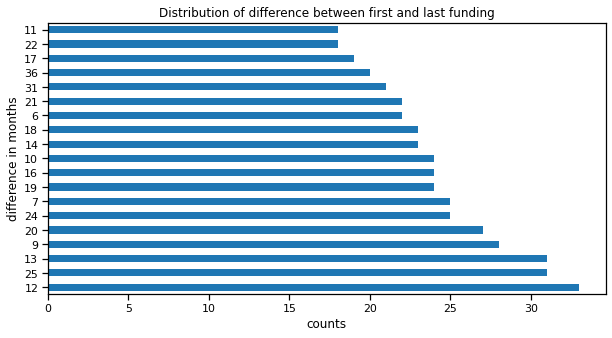

In [ ]:
acq_data2=data[data['status']=='acquired']
import matplotlib.pyplot as plt
acq_data2['first_last_funding_diff'].value_counts()[1:20].plot(kind='barh', figsize=(10,5))    
plt.xlabel('counts')
plt.ylabel('difference in months')
plt.title('Distribution of difference between first and last funding')
plt.show()

## Milestone months difference

In [ ]:
data['first_milestone_at'] = data['first_milestone_at'].astype(str)
data['last_milestone_at']=data['last_milestone_at'].astype(str)
data['first_stripped'] = data['first_milestone_at'].str.split('-')
data['last_stripped'] = data['last_milestone_at'].str.split('-')
from datetime import date
data['first_last_milestone_diff']=""
for i in range(0,len(data)):
  if((data['first_stripped'][i][0]!='nan') and (data['last_stripped'][i][0]!='nan')):
    D1=data['first_stripped'][i][2]
    M1=data['first_stripped'][i][1]
    Y1=data['first_stripped'][i][0]
    D2=data['last_stripped'][i][2]
    M2=data['last_stripped'][i][1]
    Y2=data['last_stripped'][i][0]
    
      
    d0 = date(int(Y1), int(M1), int(D1))
    d1 = date(int(Y2), int(M2), int(D2))
    delta=d1-d0
    data['first_last_milestone_diff'][i]=int(delta.days/30)
data=data.drop(['first_stripped'],axis=1)
data=data.drop(['last_stripped'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


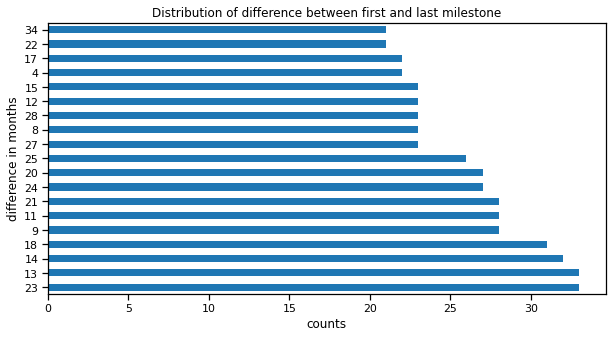

In [ ]:
acq_data3=data[data['status']=='acquired']
import matplotlib.pyplot as plt
acq_data3['first_last_milestone_diff'].value_counts()[1:20].plot(kind='barh', figsize=(10,5))    
plt.xlabel('counts')
plt.ylabel('difference in months')
plt.title('Distribution of difference between first and last milestone')
plt.show()

## Average funding  round duration

In [ ]:
data['avg_duration_fund']=""
for i in range(0,len(data)):
  if(data['funding_rounds'][i]!=0):
    data['avg_duration_fund'][i]=data['first_last_funding_diff'][i]/data['funding_rounds'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'average funding duration of 70 companies')

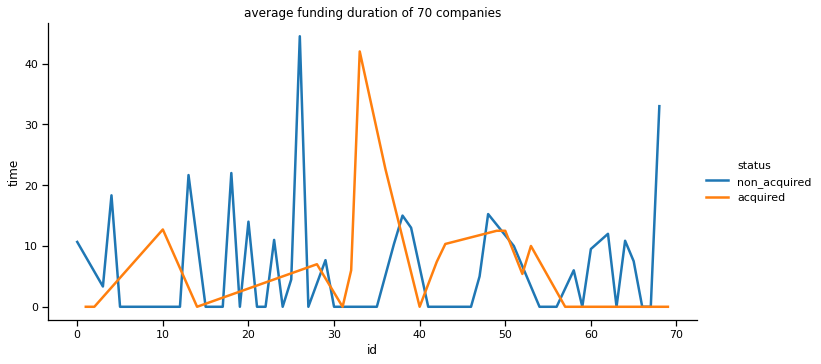

In [ ]:
l1=list(data['avg_duration_fund'])
l2=list(data['entity_id'])
l3=list(data['status'])
diff_data=pd.DataFrame({'id':[x for x in range(0,len(l1))],'time':l1,'status':l3}).sort_values(by=['id'])
sns.relplot(x="id", y="time", kind="line",hue='status' , data=diff_data[0:70],height=5,aspect=2)
plt.title('average funding duration of 70 companies')

## Average Milestone duration

In [ ]:
data['avg_duration_miletone']=""
for i in range(0,len(data)):
  if(data['milestones'][i]!=0):
    data['avg_duration_miletone'][i]=data['first_last_milestone_diff'][i]/data['milestones'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
data.head()

,id,entity_id,name,permalink,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,price_amount,price_currency_code,acquired_at,is_IT/enterprise,is_USA_based,avg_fund_per_round,first_last_funding_diff,first_last_milestone_diff,avg_duration_fund,avg_duration_miletone
0,c:1,1,Wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,NaN,NaN,NaN,1.0,1.0,13250000,32,36,10.6667,7.2
1,c:1001,1001,FriendFeed,/company/friendfeed,web,acquired,2007-10-01,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,"socialnetwork, newsfeed, socialnetworkaggregator",USA,CA,Mountain View,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,47500000.0,USD,2009-08-10,1.0,1.0,5000000,0,53,0,17.6667
2,c:10014,10014,Mobclix,/company/mobclix,Mobile Apps/services,acquired,2008-03-01,iPhone Ad Exchange Provider,Mobclix (www.mobclix.com) is the industry's la...,"techcrunch50, tc50, iphone, analytics, free-de...",USA,CA,Palo Alto,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,NaN,0.0,USD,2010-09-30,0.0,1.0,0,0,213,0,53.25
3,c:100155,100155,MTPV,/company/mtpv,cleantech,non_acquired,2003-01-01,NaN,MTPV Corporation is a clean energy company foc...,NaN,USA,TX,Austin,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,arun,NaN,NaN,NaN,0.0,1.0,3375097,10,0,3.33333,0
4,c:10018,10018,Demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,NaN,Demandbase is the first targeting and personal...,NaN,USA,CA,San Francisco,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,jason,NaN,NaN,NaN,0.0,1.0,11000000,55,33,18.3333,11


## Non invested compaies

In [ ]:
data['non_invested']=data['relationships']-data['invested_companies']

In [ ]:
data.head(6)

,id,entity_id,name,permalink,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,price_amount,price_currency_code,acquired_at,is_IT/enterprise,is_USA_based,avg_fund_per_round,first_last_funding_diff,first_last_milestone_diff,avg_duration_fund,avg_duration_miletone,non_invested
0,c:1,1,Wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,NaN,NaN,NaN,1.0,1.0,13250000,32,36,10.6667,7.2,17
1,c:1001,1001,FriendFeed,/company/friendfeed,web,acquired,2007-10-01,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,"socialnetwork, newsfeed, socialnetworkaggregator",USA,CA,Mountain View,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,47500000.0,USD,2009-08-10,1.0,1.0,5000000,0,53,0,17.6667,14
2,c:10014,10014,Mobclix,/company/mobclix,Mobile Apps/services,acquired,2008-03-01,iPhone Ad Exchange Provider,Mobclix (www.mobclix.com) is the industry's la...,"techcrunch50, tc50, iphone, analytics, free-de...",USA,CA,Palo Alto,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,NaN,0.0,USD,2010-09-30,0.0,1.0,0,0,213,0,53.25,9
3,c:100155,100155,MTPV,/company/mtpv,cleantech,non_acquired,2003-01-01,NaN,MTPV Corporation is a clean energy company foc...,NaN,USA,TX,Austin,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,arun,NaN,NaN,NaN,0.0,1.0,3375097,10,0,3.33333,0,6
4,c:10018,10018,Demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,NaN,Demandbase is the first targeting and personal...,NaN,USA,CA,San Francisco,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,jason,NaN,NaN,NaN,0.0,1.0,11000000,55,33,18.3333,11,19
5,c:100189,100189,Locatrix Communications,/company/locatrix-communications,Mobile Apps/services,non_acquired,2003-11-01,Mobile software developer,Locatrix Communications is one of AustraliaÂs...,"mobile, location-based, wireless, applications...",AUS,NaN,Brisbane,SF Bay,0,0,2003-11-01,2003-11-01,1,250000.0,2007-11-01,2007-11-01,1,2,mwhite41,NaN,NaN,NaN,0.0,0.0,250000,0,0,0,0,2


## Investment rounds and no. of relations

In [ ]:
tableau_20=[(31,119,180),(174,199,232),(255,127,14),(255,187,120)]
for i in range(len(tableau_20)):
  r,g,b=tableau_20[i]
  tableau_20[i]=(r/255.,g/255.,b/255.)

Text(0.5, 1.0, 'For acquired companies')

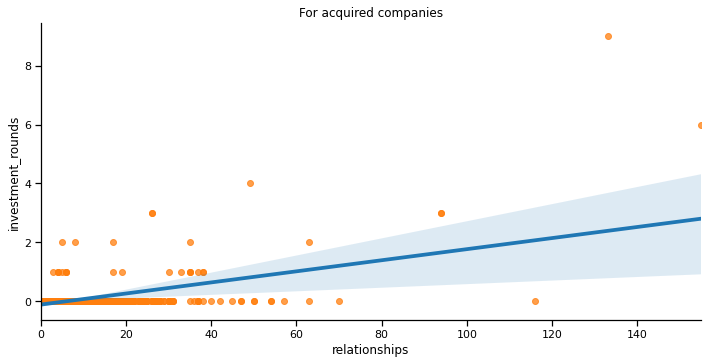

In [ ]:
sns.lmplot(x="relationships", y="investment_rounds",data=data[data['status']=='acquired'],scatter_kws={'color':tableau_20[2],'alpha':0.75},height=5,aspect=2);
plt.title('For acquired companies')

Text(0.5, 1.0, 'For non acquired companies')

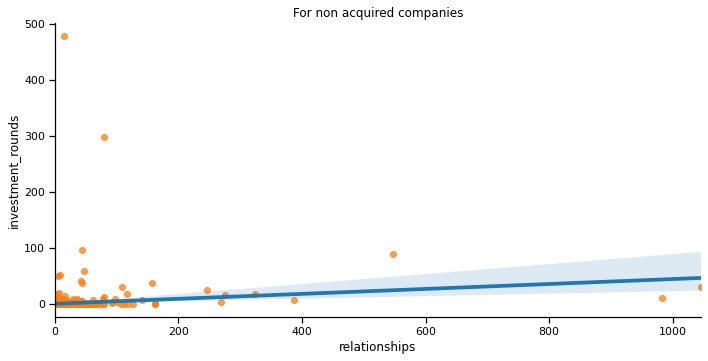

In [ ]:
sns.lmplot(x="relationships", y="investment_rounds",data=data[data['status']=='non_acquired'],scatter_kws={'color':tableau_20[2],'alpha':0.75},height=5,aspect=2);
plt.title('For non acquired companies')

# Tag list analysis

Text(0, 0.5, 'tags')

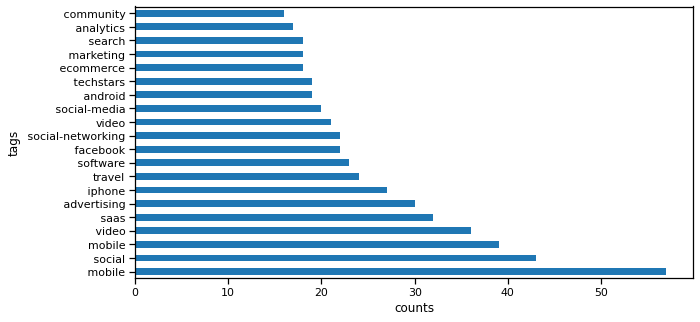

In [ ]:
data['tag_list']=data['tag_list'].astype(str)
acq_data4=data[data['status']=='acquired']
acq_data4=acq_data4.set_index(pd.Series([i for i in range(0,len(acq_data4))]))
tags=[]
for i in range(0,len(acq_data4)):
  if(acq_data4['tag_list'][i]!='nan'):
    tags.extend(list(acq_data4['tag_list'][i].split(",")))
pd.Index(list(tags)).value_counts().head(20).plot(kind='barh', figsize=(10,5))
plt.xlabel('counts')
plt.ylabel('tags')

Text(0, 0.5, 'tags')

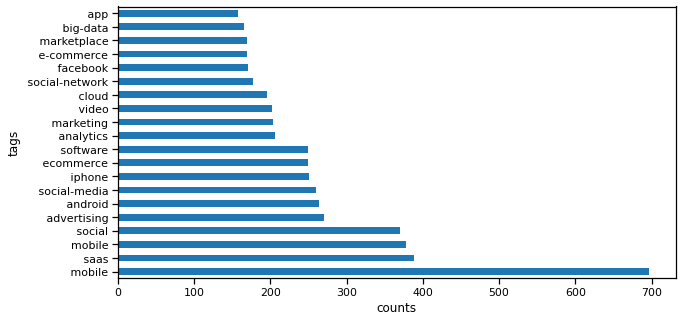

In [ ]:
data['tag_list']=data['tag_list'].astype(str)
acq_data4=data[data['status']=='non_acquired']
acq_data4=acq_data4.set_index(pd.Series([i for i in range(0,len(acq_data4))]))
tags=[]
for i in range(0,len(acq_data4)):
  if(acq_data4['tag_list'][i]!='nan'):
    tags.extend(list(acq_data4['tag_list'][i].split(",")))
pd.Index(list(tags)).value_counts().head(20).plot(kind='barh', figsize=(10,5))
plt.xlabel('counts')
plt.ylabel('tags')

In [ ]:
data.head()

,id,entity_id,name,permalink,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,price_amount,price_currency_code,acquired_at,is_IT/enterprise,is_USA_based,avg_fund_per_round,first_last_funding_diff,first_last_milestone_diff,avg_duration_fund,avg_duration_miletone,non_invested
0,c:1,1,Wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,NaN,NaN,NaN,1.0,1.0,13250000,32,36,10.6667,7.2,17
1,c:1001,1001,FriendFeed,/company/friendfeed,web,acquired,2007-10-01,Social network aggregator,[FriendFeed](http://www.friendfeed.com) aims t...,"socialnetwork, newsfeed, socialnetworkaggregator",USA,CA,Mountain View,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,47500000.0,USD,2009-08-10,1.0,1.0,5000000,0,53,0,17.6667,14
2,c:10014,10014,Mobclix,/company/mobclix,Mobile Apps/services,acquired,2008-03-01,iPhone Ad Exchange Provider,Mobclix (www.mobclix.com) is the industry's la...,"techcrunch50, tc50, iphone, analytics, free-de...",USA,CA,Palo Alto,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,NaN,0.0,USD,2010-09-30,0.0,1.0,0,0,213,0,53.25,9
3,c:100155,100155,MTPV,/company/mtpv,cleantech,non_acquired,2003-01-01,NaN,MTPV Corporation is a clean energy company foc...,nan,USA,TX,Austin,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,arun,NaN,NaN,NaN,0.0,1.0,3375097,10,0,3.33333,0,6
4,c:10018,10018,Demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,NaN,Demandbase is the first targeting and personal...,nan,USA,CA,San Francisco,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,jason,NaN,NaN,NaN,0.0,1.0,11000000,55,33,18.3333,11,19


In [ ]:
data['founded_at'] = data['founded_at'].astype(str)
data['acquired_at']=data['acquired_at'].astype(str)
data['first_stripped'] = data['founded_at'].str.split('-')
data['last_stripped'] = data['acquired_at'].str.split('-')
from datetime import date
data['lifespan']=""
for i in range(0,len(data)):
  if((data['first_stripped'][i][0]!='nan') and (data['last_stripped'][i][0]!='nan')):
    D1=data['first_stripped'][i][2]
    M1=data['first_stripped'][i][1]
    Y1=data['first_stripped'][i][0]
    D2=data['last_stripped'][i][2]
    M2=data['last_stripped'][i][1]
    Y2=data['last_stripped'][i][0]
    
      
    d0 = date(int(Y1), int(M1), int(D1))
    d1 = date(int(Y2), int(M2), int(D2))
    delta=d1-d0
    data['lifespan'][i]=int(delta.days/360)
data=data.drop(['first_stripped'],axis=1)
data=data.drop(['last_stripped'],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
acq_data0=data[data['status']=='acquired']
acq_data9=acq_data0[acq_data0['acquired_at']!='nan']
acq_data9=acq_data9[acq_data9['founded_at']!='nan']
acq_data9['lifespan']=acq_data9['lifespan'].astype(int)

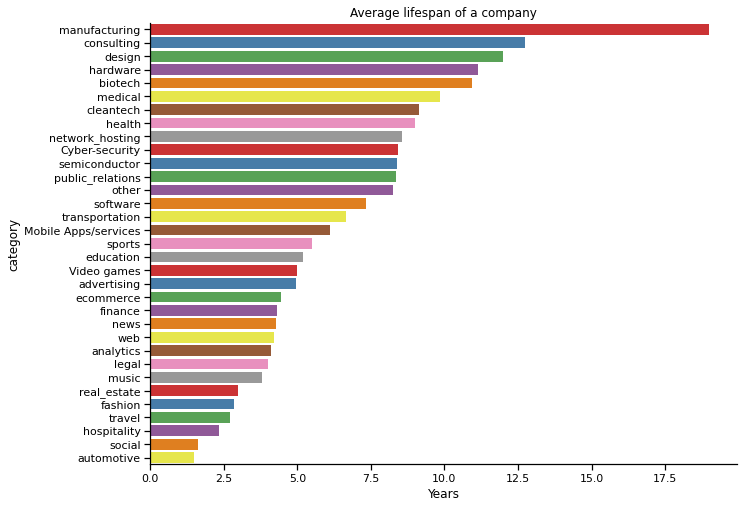

In [ ]:
sp=acq_data9.groupby(['category_code']).mean()
sp['category']=list(acq_data9.groupby(['category_code']).mean().index)
sp=sp[['category','lifespan']]
sp=sp.sort_values(by=['lifespan'],ascending=False)
sns.catplot(x='lifespan',y='category',kind='bar',palette='Set1',ci=None,data=sp,height=7,aspect=1.5);
#plt.xticks(rotation=90)
plt.xlabel('Years');
plt.title('Average lifespan of a company');

In [ ]:
data=data.drop(['description','overview','state_code','city','created_by'],axis=1)

In [ ]:
data['funding_total($M)']=data['funding_total_usd']/1000000

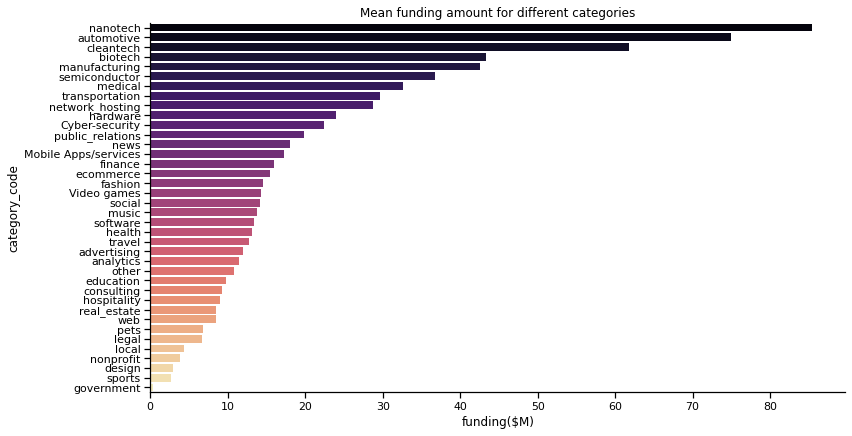

In [ ]:
sec=data.groupby(['category_code']).mean()
sec['category_code']=list(data.groupby(['category_code']).mean().index)
sec=sec.sort_values(by=['funding_total($M)'],ascending=False)
sns.catplot(x='funding_total($M)',y='category_code',kind='bar',palette='magma',ci=None,data=sec,height=6,aspect=2);
plt.xlabel('funding($M)');
plt.title('Mean funding amount for different categories');

In [ ]:
data_se=data[(data['country_code']=='IDN') |(data['country_code']=='VNM') |(data['country_code']=='THA') |(data['country_code']=='MYS') |(data['country_code']=='SGP') |(data['country_code']=='PHL') |(data['country_code']=='LAO') |(data['country_code']=='MMR') ]

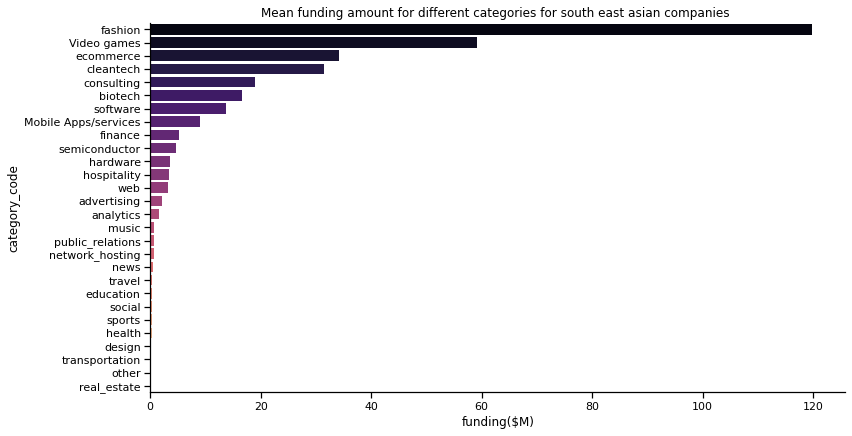

In [ ]:
sec=data_se.groupby(['category_code']).mean()
sec['category_code']=list(data_se.groupby(['category_code']).mean().index)
sec=sec.sort_values(by=['funding_total($M)'],ascending=False)
sns.catplot(x='funding_total($M)',y='category_code',kind='bar',palette='magma',ci=None,data=sec,height=6,aspect=2);
plt.xlabel('funding($M)');
plt.title('Mean funding amount for different categories for south east asian companies ');

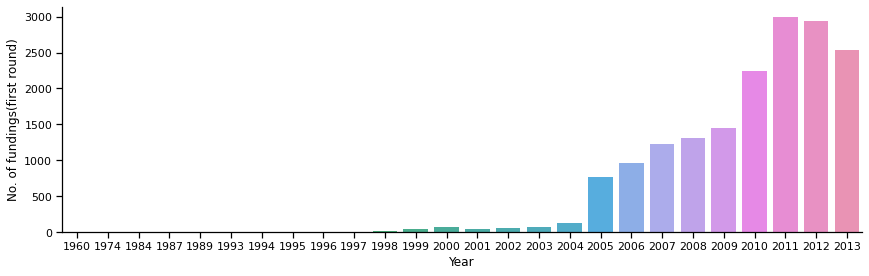

In [ ]:
data['first_fundingyear']=data['first_funding_at'].str.split('-').map(lambda x:x[0])
sns.catplot(x='first_fundingyear',kind='count',data=data,height=4,aspect=3)
plt.xlabel('Year')
plt.ylabel('No. of fundings(first round)')
plt.show();


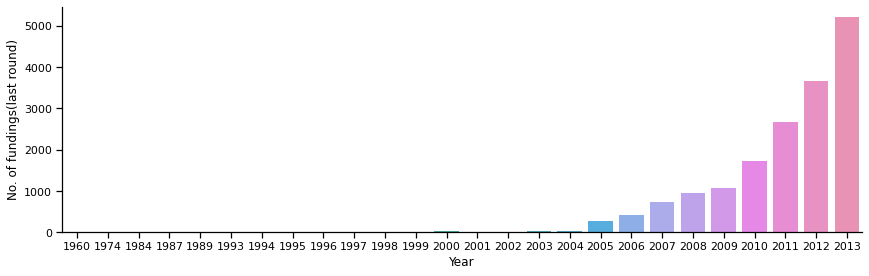

In [ ]:
data['last_fundingyear']=data['last_funding_at'].str.split('-').map(lambda x:x[0])
sns.catplot(x='last_fundingyear',kind='count',data=data,height=4,aspect=3)
plt.xlabel('Year')
plt.ylabel('No. of fundings(last round)')
plt.show();


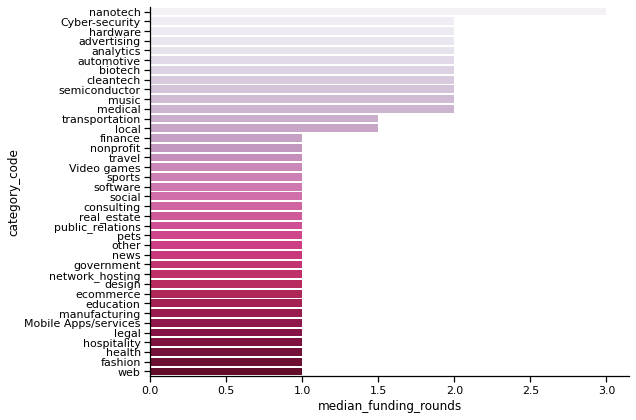

In [ ]:
sec=data.groupby(['category_code']).median()
sec['category_code']=list(data.groupby(['category_code']).median().index)
sec=sec.sort_values(by=['funding_rounds'],ascending=False)
sns.catplot(x='funding_rounds',y='category_code',kind='bar',ci=None,palette='PuRd',data=sec,height=6,aspect=1.5);
plt.xlabel('median_funding_rounds');
#plt.title('Median funding rounds for different categories for companies across globe');

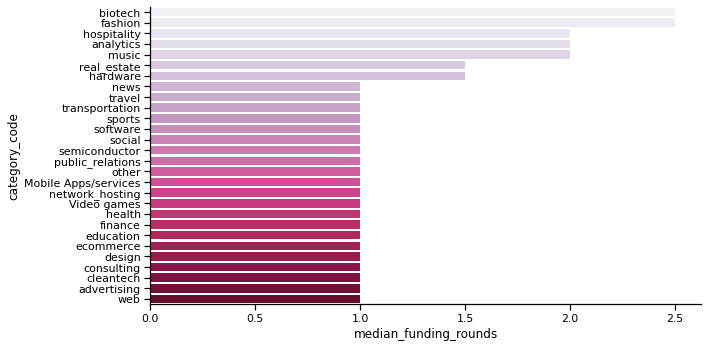

In [ ]:
sec=data_se.groupby(['category_code']).median()
sec['category_code']=list(data_se.groupby(['category_code']).median().index)
sec=sec.sort_values(by=['funding_rounds'],ascending=False)
sns.catplot(x='funding_rounds',y='category_code',kind='bar',ci=None,palette='PuRd',data=sec,height=5,aspect=2);
plt.xlabel('median_funding_rounds');
#plt.title('Median funding rounds for different categories for south eastern companies');

In [ ]:
data.head()

,id,entity_id,name,permalink,category_code,status,founded_at,tag_list,country_code,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,price_amount,price_currency_code,acquired_at,is_IT/enterprise,is_USA_based,avg_fund_per_round,first_last_funding_diff,first_last_milestone_diff,avg_duration_fund,avg_duration_miletone,non_invested,lifespan,funding_total($M),first_fundingyear,last_fundingyear
0,c:1,1,Wetpaint,/company/wetpaint,web,non_acquired,2005-10-17,"wiki, seattle, elowitz, media-industry, media-...",USA,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,NaN,NaN,nan,1.0,1.0,13250000,32,36,10.6667,7.2,17,,39.750000,2005,2008
1,c:1001,1001,FriendFeed,/company/friendfeed,web,acquired,2007-10-01,"socialnetwork, newsfeed, socialnetworkaggregator",USA,SF Bay,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,47500000.0,USD,2009-08-10,1.0,1.0,5000000,0,53,0,17.6667,14,1,5.000000,2008,2008
2,c:10014,10014,Mobclix,/company/mobclix,Mobile Apps/services,acquired,2008-03-01,"techcrunch50, tc50, iphone, analytics, free-de...",USA,SF Bay,0,0,2008-09-01,2008-09-01,1,0.0,1995-03-01,2012-09-18,4,9,0.0,USD,2010-09-30,0.0,1.0,0,0,213,0,53.25,9,2,0.000000,2008,2008
3,c:100155,100155,MTPV,/company/mtpv,cleantech,non_acquired,2003-01-01,nan,USA,Austin,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6,NaN,NaN,nan,0.0,1.0,3375097,10,0,3.33333,0,6,,10.125293,2011,2012
4,c:10018,10018,Demandbase,/company/demandbase,analytics,non_acquired,2006-01-01,nan,USA,SF Bay,0,0,2008-08-25,2013-03-28,3,33000000.0,2010-05-18,2013-03-01,3,19,NaN,NaN,nan,0.0,1.0,11000000,55,33,18.3333,11,19,,33.000000,2008,2013
